In [5]:
%pip install kagglehub # Ensure kagglehub is installed

import kagglehub

# Download latest version
path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

print("Path to dataset files:", path)

ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Path to dataset files: C:\Users\anais\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [7]:
# Loading Amazon UK product dataset 
import os

# Find a CSV file in the downloaded dataset directory
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
	df = pd.read_csv(os.path.join(path, csv_files[0]))
else:
	raise FileNotFoundError("No CSV file found in the dataset directory.")

In [8]:
df.head() # Display the first few rows of the dataset

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [32]:
df.shape # Check the shape of the dataset

(2443651, 9)

Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1-Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

In [13]:
# Calculating the frequency of each unique value in the 'category' column
frequency_table = df['category'].value_counts()

# Calculating the proportion of each unique value in the 'category' column
proportion_table = df['category'].value_counts(normalize=True)

frequency_table, proportion_table


(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Motorbike Chassis                            107
 Alexa Built-In Devices                       107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
                                             ...   
 Motorbike Chassis                         0.000044
 Alexa Built-In Devices  

A: The top 5 most listed produt categories re Sports & Outdoors, Beauty, Handmade Clothing, Shoes & Accesories, Bath & Body and Birthday Gifts.

2-Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


C:\Users\anais\AppData\Local\Temp\ipykernel_2928\2497547316.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5.index, y=top_5.values, palette="Set3")


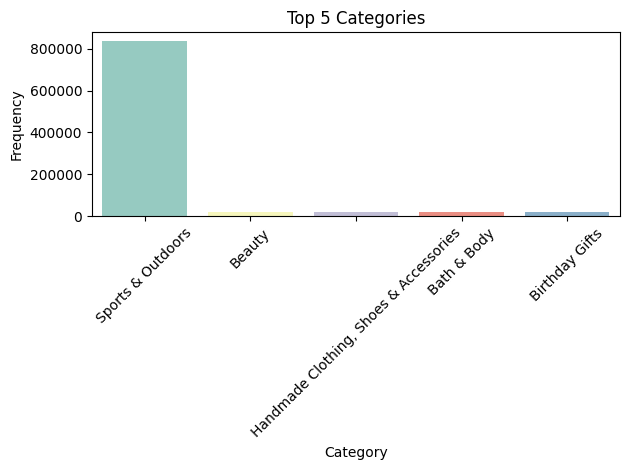

In [23]:

# Get the top 10 from the frequency table
top_5 = frequency_table.sort_values(ascending=False).head(5)

# Create the bar plot
sns.barplot(x=top_5.index, y=top_5.values, palette="Set3")

# Optional: Rotate x labels if they are long
plt.xticks(rotation=45)

# Optional: Add title and labels
plt.title("Top 5 Categories")
plt.xlabel("Category")
plt.ylabel("Frequency")

# Show the plot
plt.tight_layout()
plt.show()


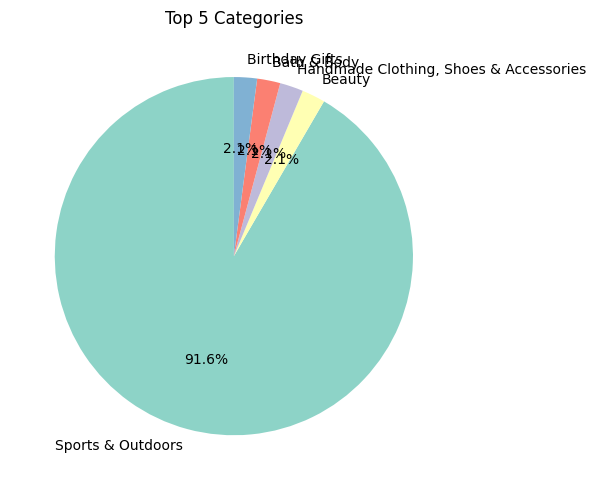

In [22]:
# Plot pie chart
top_5.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set3"),
    figsize=(6, 6)  # optional, for better aspect ratio
)

# Optional: Add title
plt.title("Top 5 Categories")

# Hide y-label
plt.ylabel('')

plt.tight_layout()
plt.show()

A: Sports & Outdoors dominate the listings

Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1-Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [27]:
mean_price = df['price'].mean().round( 2)
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(np.float64(89.24), np.float64(19.09), np.float64(9.99))

A: The average price is around £89.24, which is significantly higher than the mode, which is £ 9.99. That means that products around £9.99 are the most sold, or customers have a preference for products in the £9.99 range.

2-Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

In [29]:
variance_price = df['price'].var().round(2)
std_dev_price = df['price'].std().round(2)
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(np.float64(119445.49),
 np.float64(345.61),
 np.float64(0.0),
 np.float64(100000.0),
 np.float64(100000.0),
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

A: The variance is high (119445.49), indicating that the values in the dataset are significantly spread out from the mean. The average price variation from the mean is approximately £345.61. Given that there are products priced at zero and the highest price is £100,000, the range corresponds to the highest price. 75% of the products cost less than £45.99, indicating the existence of outliers.

3-Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

<Axes: xlabel='price', ylabel='Count'>

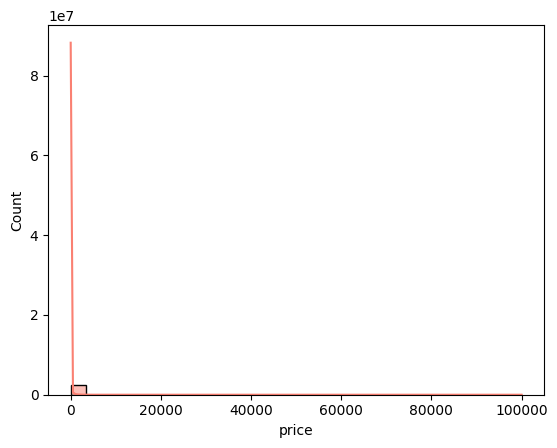

In [31]:
# Plotting the distribution of product prices
sns.histplot(df['price'], kde=True, bins=30, color="salmon")

A: There's a few extreme outliers with high price which makes it difficult to read. To fix the issue use a log scale to spread out the lower and higher prices more evenly and experiment with bins.

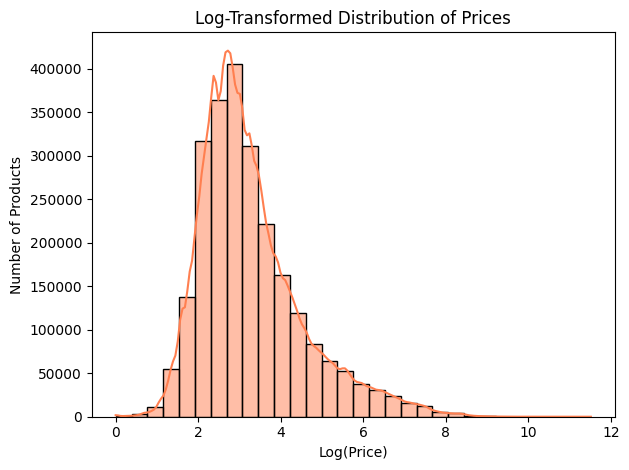

In [ ]:

# Add a small constant to avoid log(0)
df['log_price'] = np.log1p(df['price'])

sns.histplot(df['log_price'], bins=30, kde=True, color='coral')
plt.title("Log-Transformed Distribution of Prices")
plt.xlabel("Log(Price)")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.show()


<Axes: ylabel='price'>

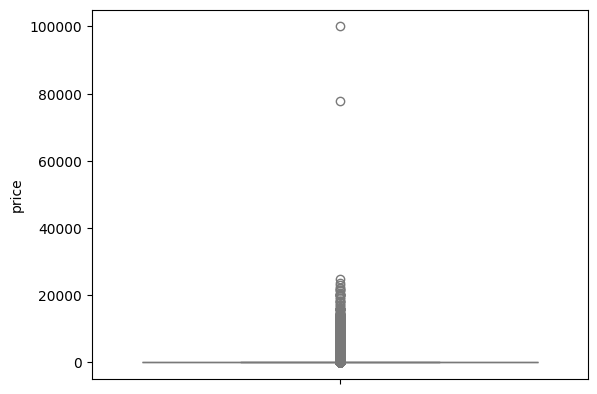

In [33]:
# Plotting a boxplot for the 'price' column with a light blue color
sns.boxplot(data = df['price'], color="lightblue")

Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1-Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

In [36]:
mean_rating = df['stars'].mean().round( 2)
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

mean_rating, median_rating, mode_rating

(np.float64(2.15), np.float64(0.0), np.float64(0.0))

A: The trend is for customers to not rate the products.

2-Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

In [38]:
variance_rating = df['stars'].var().round(2)
std_dev_rating = df['stars'].std().round(2)
min_rating = df['stars'].min()
max_rating = df['stars'].max()
range_rating = max_rating - min_rating
quantiles_rating = df['stars'].quantile([0.25, 0.5, 0.75])

variance_rating, std_dev_rating, min_rating, max_rating, range_rating, quantiles_rating

(np.float64(4.82),
 np.float64(2.19),
 np.float64(0.0),
 np.float64(5.0),
 np.float64(5.0),
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

A: There's a wide variation in custmer feedback. 50% of the a ratings are 0 and only 25% have a rating above 4.4.

3-Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

In [ ]:
skewness_rating = df['stars'].skew().round(2)
kurtosis_rating = df['stars'].kurtosis().round(2)

skewness_rating, kurtosis_rating

(np.float64(0.08), np.float64(-1.93))

A: There is a positive skew, indicating that the ratings lean towards lower levels. Additionally, since the kurtosis is negative, the ratings are more evenly distributed across the range, resulting in fewer extreme scores.

4-Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


<Axes: xlabel='stars', ylabel='Count'>

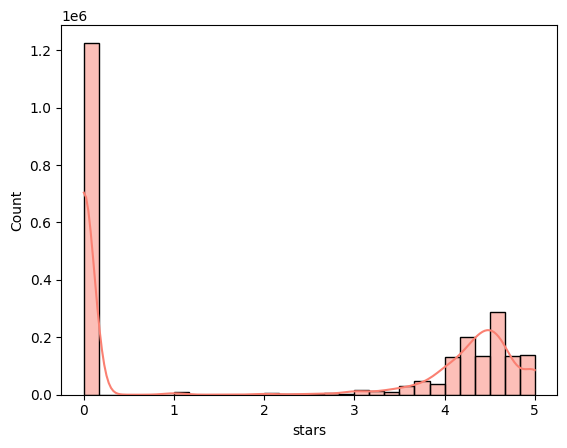

In [ ]:
# Plotting the distribution of product ratings
sns.histplot(df['stars'], kde=True, bins=30, color="salmon")

A: Rating 0 is the most common.